In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import sys

# number of nodes and edges
NODES = 5
EDGES = 10

In [ ]:
# creates a list of random edges along with their weights
edges  = []
for i in range(EDGES):
    while True:
        source = random.randint(1, NODES)
        target = random.randint(1, NODES)
        if source != target:
            for edge in edges:
                if source != edge[0] and target != edge[1]:
                    break
                
    
    weight = random.randint(50, 100)
    edges.append((source, target, weight))

In [15]:
# creates a directed graph

G = nx.DiGraph()
G.add_nodes_from(range(1, NODES))
G.add_weighted_edges_from(edges)

In [16]:
# create a dictionary with edge as value and weight as key

weights = {}
for edge in G.edges:
    weights[edge] = G.get_edge_data(edge[0], edge[1])['weight']

In [17]:
# Selecting a random source and target
source = 0
target = 0
while source == target:
    source = random.randint(1, NODES)
    target = random.randint(1, NODES)

print('Source:', source)
print('Target:', target)

Source: 2
Target: 5


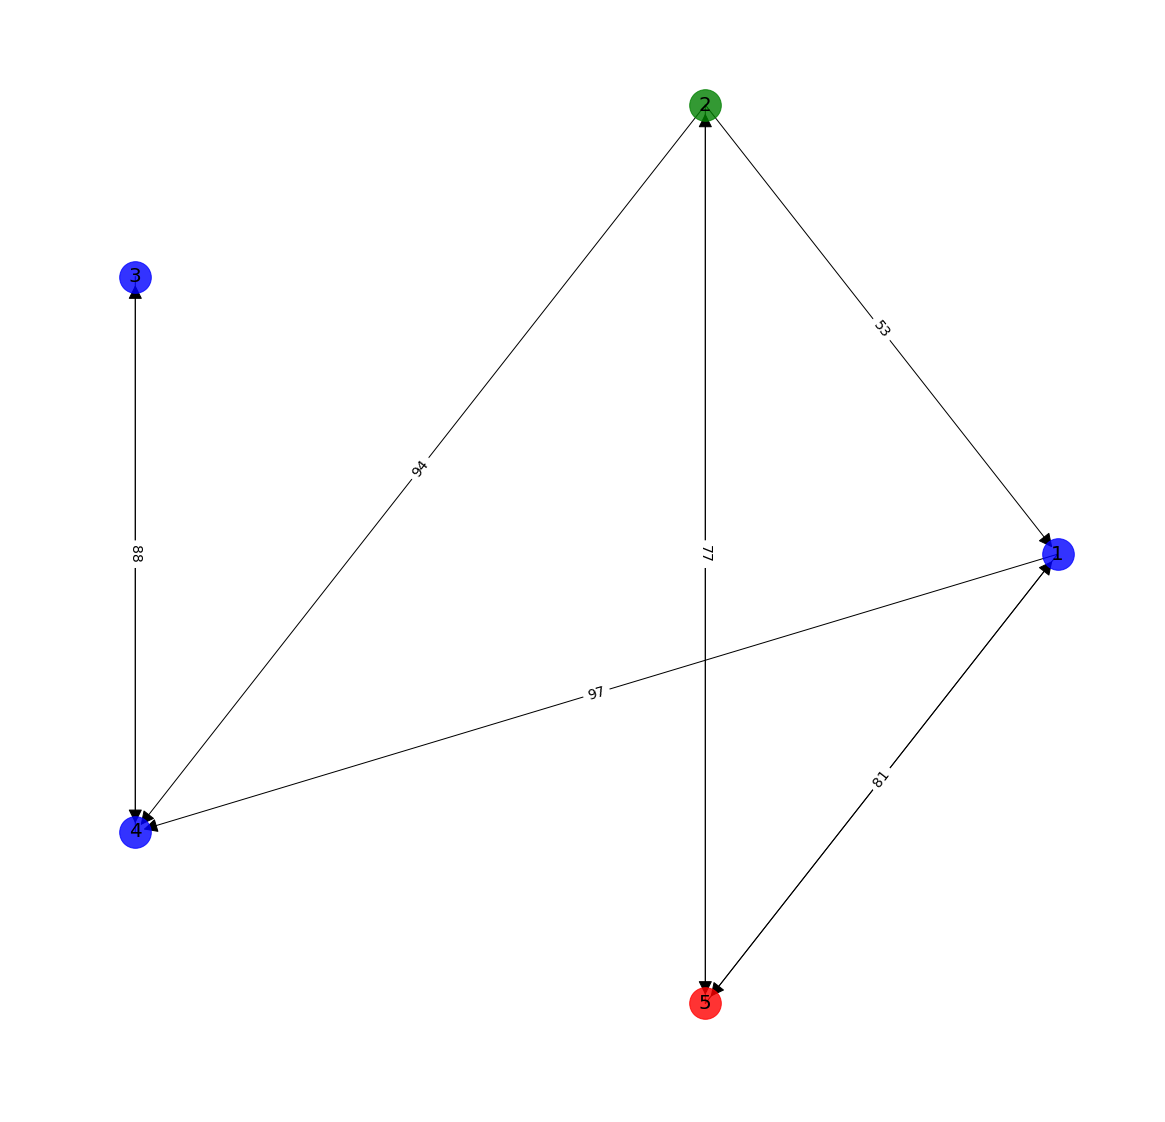

In [18]:
plt.figure(figsize=(20, 20))
pos = nx.shell_layout(G)

# draw nodes with labels
nodelist = list(range(1, NODES+1))
nodelist.remove(source)
nodelist.remove(target)

nx.draw_networkx_nodes(G, pos, nodelist, node_color='b', node_size=1000, alpha=0.8)
nx.draw_networkx_nodes(G, pos, nodelist = [source], node_color='g', node_size=1000, alpha=0.8)
nx.draw_networkx_nodes(G, pos, nodelist = [target], node_color='r', node_size=1000, alpha=0.8)
nx.draw_networkx_labels(G, pos, font_size=20)

# draw edges with weight as labels
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=30)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights, font_size=14)

plt.axis('off')
plt.show()

In [8]:
# Min Heap Functions
key = {}
parent = {}

def build_min_heap(A):
    heap_size = len(A)
    for i in range(heap_size // 2, -1, -1):
        min_heapify(A, heap_size, i)

def min_heapify(A, heap_size, i):
    l = 2*i + 1
    r = (2*i) + 2
    
    smallest = None
    if l < heap_size and A[l][1] < A[i][1]:
        smallest = l
    else:
        smallest = i
    
    if r < heap_size and A[r][1] < A[smallest][1]:
        smallest = r
    
    if smallest != i:
        A[i], A[smallest] = A[smallest], A[i]
        min_heapify(A, heap_size, smallest)

def extract_min(A, vertices):
    heap_size = len(A)
    
    if heap_size < 0:
        print("heap underlfow")
    
    minimum = A[0]
    A[0] = A[heap_size - 1]
    heap_size -= heap_size
  
    min_heapify(A, heap_size, 0)
    try:
        vertices.remove(minimum[0])
    except ValueError:
        pass
    
    return minimum

In [9]:
# Dijkstra Functions

def relax(u, v, w):
    if key[v] > key[u[0]] + w:
        key[v] = key[u[0]] + w
        parent[v] = u[0]

def initialize_single_source(G, s):
    for vertex in G.nodes():
        key[vertex] = sys.maxsize
        parent[vertex] = None
        key[s] = 0

def dijkstra(G, source):
    initialize_single_source(G, source)
    S = []
    q = list(zip(key.keys(), key.values()))
    build_min_heap(q)
    vertices = list(key.keys())
    
    while len(vertices) != 0:
        u = extract_min(q, vertices)
        S.append(u)
        
        for v in G.adj[u[0]]:
            relax(u, v, G[u[0]][v]['weight'])
            
        weights = []
        for v in vertices:
            weights.append(key[v])
        
        q = list(zip(vertices, weights))
        build_min_heap(q)

In [10]:
dijkstra(G, source)
print('Parent Set', parent)
print('Key Set', key)

Parent Set {1: None, 2: 7, 3: 18, 4: 8, 5: 9, 6: 14, 7: 1, 8: 7, 9: 14, 10: 7, 11: 18, 12: 20, 13: 6, 14: 1, 15: 16, 16: 1, 17: 7, 18: 1, 19: 20, 20: 1}
Key Set {1: 0, 2: 117, 3: 153, 4: 178, 5: 230, 6: 151, 7: 66, 8: 119, 9: 153, 10: 154, 11: 154, 12: 184, 13: 245, 14: 98, 15: 159, 16: 89, 17: 165, 18: 76, 19: 174, 20: 90}


In [11]:
node = target
edgelist = []
while node != source:
    edge = (parent[node], node)
    node = parent[node]
    edgelist.append(edge)

[(7, 17), (1, 7)]


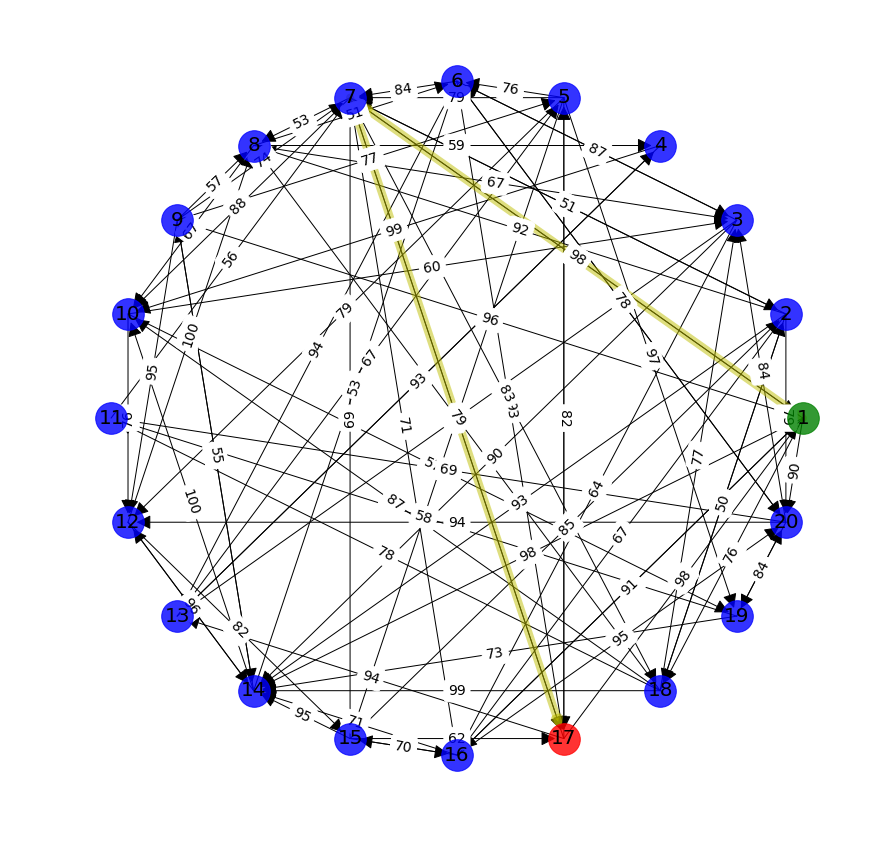

In [12]:
plt.figure(figsize=(15, 15))
pos = nx.shell_layout(G)

# draw nodes with labels
nodelist = list(range(1, NODES+1))
nodelist.remove(source)
nodelist.remove(target)

nx.draw_networkx_nodes(G, pos, nodelist, node_color='b', node_size=1000, alpha=0.8)
nx.draw_networkx_nodes(G, pos, nodelist = [source], node_color='g', node_size=1000, alpha=0.8)
nx.draw_networkx_nodes(G, pos, nodelist = [target], node_color='r', node_size=1000, alpha=0.8)
nx.draw_networkx_labels(G, pos, font_size=20)

# draw edges with weight as labels
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=30)
nx.draw_networkx_edges(G, pos, edgelist=edgelist, width=8, alpha=0.5, edge_color='y')
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights, font_size=14)


plt.axis('off')
plt.show()